<a href="https://colab.research.google.com/github/BRBC/PIM_Proiect/blob/main/Laborator6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
from matplotlib import patches
from matplotlib.pyplot import axvline, axhline
from collections import defaultdict

In [2]:
def zplane(z, p, filename=None):
    # Plot the complex z-plane given zeros and poles.
    # get a figure/plot
    ax = plt.subplot(2, 2, 1)
    # Add unit circle and zero axes    
    unit_circle = patches.Circle((0,0), radius=1, fill=False,color='black', ls='solid', alpha=0.1)
    ax.add_patch(unit_circle)
    axvline(0, color='0.7')
    axhline(0, color='0.7')
    # Plot the poles and set marker properties
    poles = plt.plot(p.real, p.imag, 'x', markersize=9, alpha=0.5)
    # Plot the zeros and set marker properties
    zeros = plt.plot(z.real, z.imag,  'o', markersize=9,color='none', alpha=0.5, markeredgecolor=poles[0].get_color(), )
    # Scale axes to fit
    r = 1.5 * np.amax(np.concatenate((abs(z), abs(p), [1])))
    plt.axis('scaled')
    plt.axis([-r, r,-r, r])
    #    ticks = [-1, -.5, .5, 1]
    #    plt.xticks(ticks)
    #    plt.yticks(ticks)
    # Finding duplicates by same pixel coordinates (hacky for now):
    poles_xy = ax.transData.transform(np.vstack(poles[0].get_data()).T)
    zeros_xy = ax.transData.transform(np.vstack(zeros[0].get_data()).T)    
    # dict keys should be ints for matching, but coords should be floats for 
    # keeping location of text accurate while zooming
    d = defaultdict(int)
    coords = defaultdict(tuple)
    for xy in poles_xy:
        key = tuple(np.rint(xy).astype('int'))
        d[key] += 1
        coords[key] = xy
    for key, value in d.items():
        if value > 1:
            x, y = ax.transData.inverted().transform(coords[key])
            plt.text(x, y,r' ${}^{' + str(value) + '}$',fontsize=13,)
    d = defaultdict(int)
    coords = defaultdict(tuple)
    for xy in zeros_xy:
        key = tuple(np.rint(xy).astype('int'))
        d[key] += 1
        coords[key] = xy
    for key, value in d.items():
        if value > 1:
            x, y = ax.transData.inverted().transform(coords[key])
            plt.text(x, y, r' ${}^{' + str(value) +'}$',fontsize=13,)
    
    if filename is None:
        plt.show()
    else:
        plt.savefig(filename)
        print ('Pole-zero plot saved to ' + str(filename))
        

In [3]:
def cuant(a, qtype, B):
    s = 2 ** (np.ceil(np.log(np.max(np.abs(a)))/np.log(2)))
    scn = 2 ** (B-1) / s
    aq = np.array(a) * scn
    if (qtype == 't'):
        aq = 1.0 / scn* np.floor(aq)
    elif (qtype == 'r'):
        aq = 1.0 / scn * np.array(np.round(aq))
    elif (qtype == 'm'):
        aq = 1.0 / scn * (np.array(np.sign(aq)) * np.array(np.floor(np.abs(aq))))
        print ("asdf")
    else:
        print("scrie parametru corect")
    return aq


/usr/local/lib/python3.7/dist-packages/scipy/signal/filter_design.py:476: RuntimeWarning: invalid value encountered in true_divide
  npp_polyval(zm1, a, tensor=False))


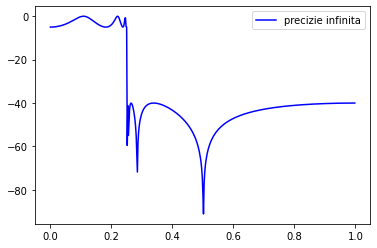

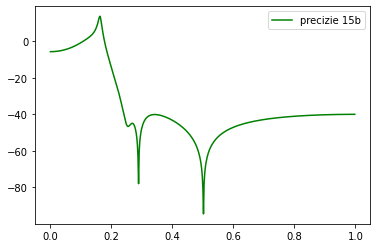

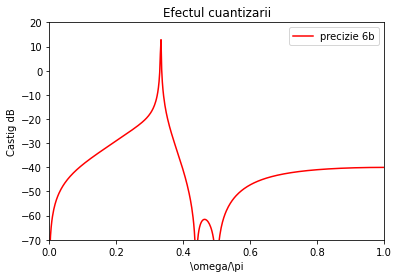

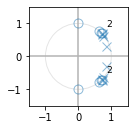

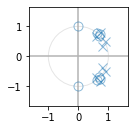

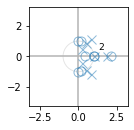

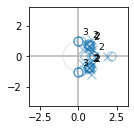

In [9]:
# Parametrii filtrului eliptic
F3db = 500.0
Rp = 5.0
Rs = 40.0
Fes = 4000.0
# Coeficientii filtrului
b, a = sig.ellip(8, Rp, Rs, 2 * F3db / Fes)
# precizie infinita (precizia calculatorului)
w0, h0 = sig.freqz (b, a)
#h0[0] = 0.00000001
# cuantizare pe 15 biti
B1 = 15 # 14 + 1 bit de semn
b1 = cuant (b, 'r', B1)
a1 = cuant (a, 'r', B1)
w1, h1 = sig.freqz(b1, a1)
# cuantizare pe 6 biti
B2 = 7
b2 = cuant (b, 'r', B2)
a2 = cuant (a, 'r', B2)
w2, h2 = sig.freqz(b2, a2)
# reprezentare raspuns în frecventa
#plt.figure(1)
plt.plot(w0/np.pi,20.0*np.log10(np.abs(h0)),'b')
plt.legend(['precizie infinita'])
plt.show()
plt.plot(w1/np.pi,20.0*np.log10(np.abs(h1)),'g')
plt.legend(['precizie 15b'])
plt.show()
plt.plot(w2/np.pi,20.0*np.log10(np.abs(h2)),'r')
plt.xlabel('\omega/\pi')
plt.ylabel('Castig dB')
plt.title('Efectul cuantizarii');
#plt.legend(['precizie infinita'+ str(B1)+' biti', str(B2)+'biti', str(0)])
plt.legend(['precizie 6b'])
plt.axis([0, 1, -70, 20])
plt.show()
zplane(np.roots(b), np.roots(a))
zplane(np.roots(b1), np.roots(a1))
zplane(np.roots(b2), np.roots(a2))
zplane(np.concatenate((np.roots(b),np.roots(b1),np.roots(b2)), axis=None),np.concatenate((np.roots(a),np.roots(a1),np.roots(a2)), axis=None))


In [10]:
get_ipython().run_line_magic('matplotlib', 'inline')
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert, chirp


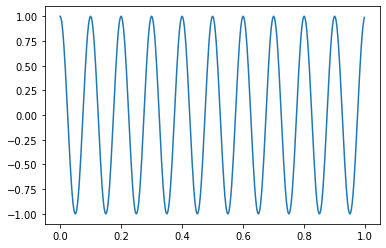

In [13]:
duration = 1.0
fs = 400.0
samples = int(fs*duration)
t = np.arange(samples) / fs
#signal = chirp(t, 50.0, t[-1], 50.0)
signal=1.0*np.sin(2.0*np.pi*50*t)
sig2=chirp(t, 10.0, t[-1], 10.0)
signal *= (1.0 + 1.0 * np.sin(2.0*np.pi*3.0*t) )
plt.plot(t, sig2)


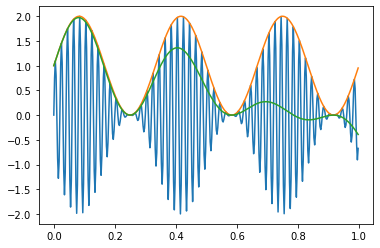

In [14]:
analytic_signal = hilbert(signal)
amplitude_envelope = np.abs(analytic_signal)
instantaneous_phase = np.unwrap(np.angle(analytic_signal))
instantaneous_frequency = (np.diff(instantaneous_phase) /(2.0*np.pi) * fs)
plt.plot(t, signal)
plt.plot(t, amplitude_envelope)
plt.plot(t, demodulated)
#plt.xlim(0, 20)


# In[ ]:



In [26]:
get_ipython().run_line_magic('load_ext', 'autoreload')
get_ipython().run_line_magic('autoreload', '2')
get_ipython().run_line_magic('matplotlib', 'inline')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
# Plot settings
plt.rcParams['figure.figsize'] = (20, 5) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams.update({'font.size': 22})

In [17]:
def simu_waves(f, dt, amp0=1, phi0=0):
  """
  Simulaz forma de unda
  y(t) = amp0 * cos(phi(t) + phi0), 
  cu phi(t) = 2 * pi * \int_0^t f(t) * dt. 
    
  f: frecventa instantanee
  dt: Interval de timp
  amp0: Amplitudine.
  phi0: faza initial. daca este -pi/2, avem sinus  
  """
    
  phi = 2 * np.pi * np.cumsum(f) * dt
  y = amp0*np.cos(phi+ phi0)
    
  return y

In [18]:
T = 10   # Time duration in (second)
fs = 100 # Sampling rate (Hz)
fm = 0.8 # Modulation frequency (Hz)
B = 10   # Bandwidth (Hz)

# Time array
t = np.linspace(0, T, T*fs, endpoint=False)
dt = t[1] - t[0] # time duration

In [19]:
def simu_freq_square(t, fm=1, B=1, fd=0, duty=0.5):
  '''
  Simulated frequencies with square modulation.

  t: Time array.
  fm: Modulation frequency.
  fd: Doppler frequency shift.
  B: Bandwidth.
  '''
  f = B*0.5*(signal.square(2 * np.pi * fm * t, duty=duty) + 1)
  f += fd

  return f

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 0, 'Time (seconds)')

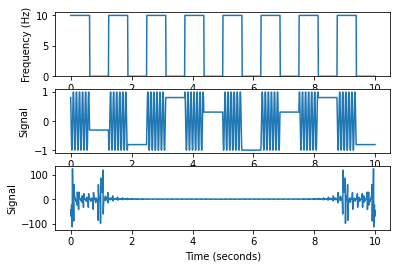

In [29]:
# Frequency array
f = simu_freq_square(t, fm, B, fd=0)

# Signal amplitude
A = simu_waves(f, dt, amp0=1, phi0=0)

plt.subplot(3, 1, 1)
plt.plot(t, f)
plt.ylabel('Frequency (Hz)')
plt.ylim(0, B+0.5)

plt.subplot(3, 1, 2)
plt.plot(t, A)
plt.ylabel('Signal')
plt.xlabel('Time (seconds)')

spectrum = np.fft.fft(A)
plt.subplot(3, 1, 3)
plt.plot(t, spectrum)
plt.ylabel('Signal')
plt.xlabel('Time (seconds)')

In [23]:
def simu_freq_sawtooth(t, fm=1, B=1, fd=0, width=0.5):
    '''
    Simulated frequencies of sawtooth modulation.

    t: Time array.
    fm: Modulation frequency.
    fd: Doppler frequency shift.
    B: Bandwidth.
    '''
    f = B*0.5*(signal.sawtooth(2 * np.pi * fm * t, width=width) + 1)
    f += fd
    return f

Text(0.5, 0, 'Time (seconds)')

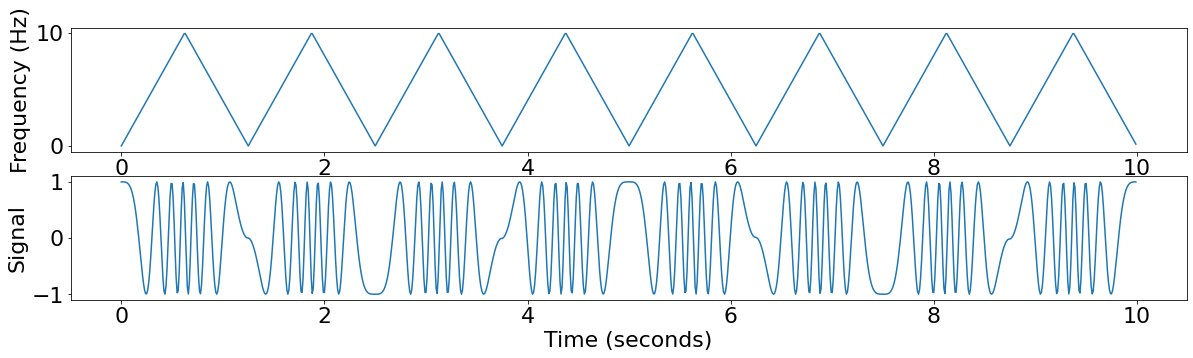

In [24]:
# Fequency array
f = simu_freq_sawtooth(t, fm, B, fd=0, width=0.5)

# Signal amplitude
A = simu_waves(f, dt, amp0=1, phi0=0)

plt.subplot(2, 1, 1)
plt.plot(t, f)
plt.ylabel('Frequency (Hz)')

plt.subplot(2, 1, 2)
plt.plot(t, A)
plt.ylabel('Signal')
plt.xlabel('Time (seconds)')